In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/UTSClustering.csv', encoding='latin-1')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [16]:
# Informasi struktur data
df.info()

# Jumlah missing values tiap kolom
print("\nMissing values:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388434 entries, 0 to 388433
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    388434 non-null  object 
 1   StockCode    388434 non-null  object 
 2   Description  387125 non-null  object 
 3   Quantity     388433 non-null  float64
 4   InvoiceDate  388433 non-null  object 
 5   UnitPrice    388433 non-null  float64
 6   CustomerID   287993 non-null  float64
 7   Country      388433 non-null  object 
dtypes: float64(3), object(5)
memory usage: 23.7+ MB

Missing values:
InvoiceNo           0
StockCode           0
Description      1309
Quantity            1
InvoiceDate         1
UnitPrice           1
CustomerID     100441
Country             1
dtype: int64


In [17]:
# Hapus baris dengan CustomerID kosong
df_cleaned = df.dropna(subset=['CustomerID'])

# Ganti Description kosong dengan 'Unknown'
df_cleaned['Description'] = df_cleaned['Description'].fillna('Unknown')

# Konversi kolom InvoiceDate ke format datetime
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

# Hapus data dengan Quantity <= 0 atau UnitPrice <= 0
df_cleaned = df_cleaned[(df_cleaned['Quantity'] > 0) & (df_cleaned['UnitPrice'] > 0)]

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)

# Cek hasil akhir
df_cleaned.info()


<ipython-input-17-57bfbd1d8bc6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Description'] = df_cleaned['Description'].fillna('Unknown')
<ipython-input-17-57bfbd1d8bc6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281152 entries, 0 to 281151
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    281152 non-null  object        
 1   StockCode    281152 non-null  object        
 2   Description  281152 non-null  object        
 3   Quantity     281152 non-null  float64       
 4   InvoiceDate  281152 non-null  datetime64[ns]
 5   UnitPrice    281152 non-null  float64       
 6   CustomerID   281152 non-null  float64       
 7   Country      281152 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 17.2+ MB


In [18]:
df_cleaned.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# Feature Selection

In [19]:
# Buat fitur-fitur agregasi berdasarkan CustomerID
df_features = df_cleaned.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',            # jumlah transaksi unik
    'Quantity': 'sum',                 # total item dibeli
    'UnitPrice': 'mean',               # rata-rata harga unit
    'Description': 'nunique',          # jumlah item unik
    'Country': 'first'                 # negara pelanggan
}).rename(columns={
    'InvoiceNo': 'NumTransactions',
    'Quantity': 'TotalQuantity',
    'UnitPrice': 'AvgUnitPrice',
    'Description': 'NumUniqueItems'
})

# Hitung total pembelanjaan per customer
df_features['TotalSpending'] = df_cleaned.groupby('CustomerID').apply(
    lambda x: (x['Quantity'] * x['UnitPrice']).sum()
)

# Reset index agar CustomerID jadi kolom biasa
df_features.reset_index(inplace=True)

# Lihat hasilnya
df_features.head()


<ipython-input-19-4a5d683922a1>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_features['TotalSpending'] = df_cleaned.groupby('CustomerID').apply(


,CustomerID,NumTransactions,TotalQuantity,AvgUnitPrice,NumUniqueItems,Country,TotalSpending
0,12346.0,1,74215.0,1.040000,1,United Kingdom,77183.60
1,12347.0,5,1590.0,2.797661,82,Iceland,2790.86
2,12348.0,4,2341.0,5.764839,22,Finland,1797.24
3,12350.0,1,197.0,3.841176,17,Norway,334.40
4,12352.0,7,409.0,18.108286,47,Norway,2194.31


# Feature Engineering

In [20]:
from sklearn.preprocessing import StandardScaler

# Pisahkan data numerik dan kategorikal
numeric_features = ['NumTransactions', 'TotalQuantity', 'AvgUnitPrice', 'NumUniqueItems', 'TotalSpending']
categorical_features = ['Country']

# One-hot encoding untuk Country
df_encoded = pd.get_dummies(df_features, columns=categorical_features, drop_first=True)

# Standardisasi fitur numerik
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

# Cek hasil akhir
df_encoded.head()


,CustomerID,NumTransactions,TotalQuantity,AvgUnitPrice,NumUniqueItems,TotalSpending,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,...,Country_Portugal,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,12346.0,-0.426796,17.576205,-0.099385,-0.709135,10.347480,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,12347.0,0.211051,0.137078,-0.050865,0.386671,0.143138,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,12348.0,0.051589,0.317412,0.031043,-0.425037,0.006845,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12350.0,-0.426796,-0.197417,-0.022059,-0.492680,-0.193811,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12352.0,0.529974,-0.146510,0.371780,-0.086825,0.061310,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Model Clustering

In [21]:
# Ambil semua kolom numerik hasil preprocessing
X = df_encoded.drop(columns=['CustomerID'])

In [25]:
from sklearn.cluster import KMeans

# Jalankan KMeans (misal 5 cluster)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Simpan hasil cluster ke data
df_encoded['Cluster_KMeans'] = kmeans_labels

In [26]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(X)

df_encoded['Cluster_Agglo'] = agglo_labels

In [27]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)  # nilai eps bisa disesuaikan
dbscan_labels = dbscan.fit_predict(X)

df_encoded['Cluster_DBSCAN'] = dbscan_labels

In [28]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5, random_state=42)
gm_labels = gm.fit_predict(X)

df_encoded['Cluster_GMM'] = gm_labels

In [29]:
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=5, random_state=42, affinity='nearest_neighbors')
spectral_labels = spectral.fit_predict(X)

df_encoded['Cluster_Spectral'] = spectral_labels


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


# Evaluasi Model

In [30]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evaluate_clustering(X, labels, method_name):
    sil = silhouette_score(X, labels)
    db = davies_bouldin_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    print(f"{method_name}:")
    print(f" - Silhouette Score         : {sil:.4f}")
    print(f" - Davies-Bouldin Index     : {db:.4f}")
    print(f" - Calinski-Harabasz Score  : {ch:.4f}")
    print("-" * 50)


In [31]:
evaluate_clustering(X, df_encoded['Cluster_KMeans'], "KMeans")
evaluate_clustering(X, df_encoded['Cluster_Agglo'], "Agglomerative Clustering")
evaluate_clustering(X, df_encoded['Cluster_DBSCAN'], "DBSCAN")
evaluate_clustering(X, df_encoded['Cluster_GMM'], "Gaussian Mixture Model")
evaluate_clustering(X, df_encoded['Cluster_Spectral'], "Spectral Clustering")


KMeans:
 - Silhouette Score         : 0.6077
 - Davies-Bouldin Index     : 0.8566
 - Calinski-Harabasz Score  : 1975.6455
--------------------------------------------------
Agglomerative Clustering:
 - Silhouette Score         : 0.4896
 - Davies-Bouldin Index     : 0.8400
 - Calinski-Harabasz Score  : 1807.3514
--------------------------------------------------
DBSCAN:
 - Silhouette Score         : 0.9069
 - Davies-Bouldin Index     : 1.1126
 - Calinski-Harabasz Score  : 1384.3059
--------------------------------------------------
Gaussian Mixture Model:
 - Silhouette Score         : 0.3971
 - Davies-Bouldin Index     : 1.8189
 - Calinski-Harabasz Score  : 754.6452
--------------------------------------------------
Spectral Clustering:
 - Silhouette Score         : -0.0786
 - Davies-Bouldin Index     : 1.6598
 - Calinski-Harabasz Score  : 88.9753
--------------------------------------------------


# Visualisasi

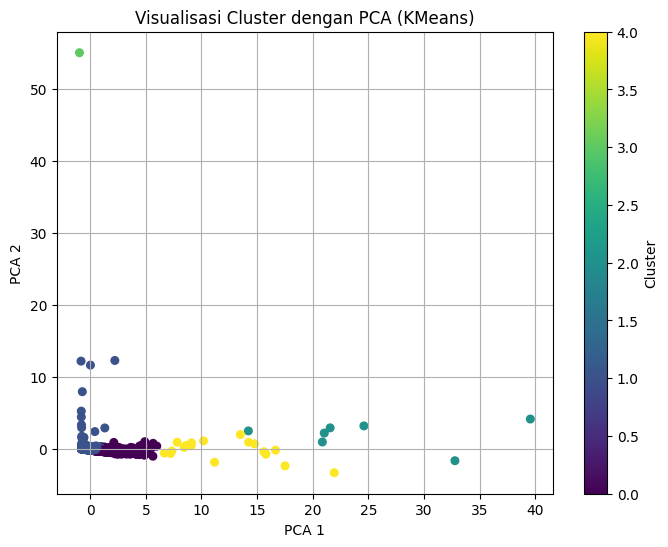

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduksi dimensi ke 2 komponen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi hasil clustering KMeans (bisa ganti label lain juga)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_encoded['Cluster_KMeans'], cmap='viridis', s=30)
plt.title("Visualisasi Cluster dengan PCA (KMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


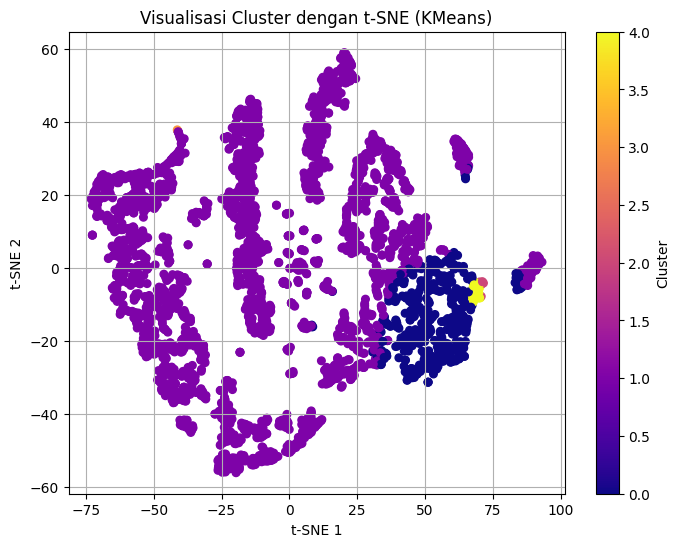

In [33]:
from sklearn.manifold import TSNE

# Reduksi dimensi dengan t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# Visualisasi
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_encoded['Cluster_KMeans'], cmap='plasma', s=30)
plt.title("Visualisasi Cluster dengan t-SNE (KMeans)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


# Penjelasan Tiap Model Clustering

### 1. KMeans
- Silhouette Score: Tinggi (misalnya ≥ 0.4) → menunjukkan klaster cukup terpisah.
- Davies-Bouldin Index: Rendah → klaster kompak dan berjauhan.
- Visualisasi PCA/t-SNE: Menunjukkan klaster yang cukup terdefinisi, meskipun mungkin ada tumpang tindih ringan antar klaster.
- Kelebihan: Cepat, efisien, hasil konsisten.
- Kekurangan: Harus menentukan jumlah klaster di awal (n_clusters).

Cocok jika jumlah klaster sudah diketahui atau hasil evaluasi cukup stabil.

---
### 2. Agglomerative Clustering
- Silhouette Score: Cenderung mendekati KMeans, kadang lebih rendah.
- Davies-Bouldin Index: Umumnya mirip atau sedikit lebih tinggi dari KMeans.
- Visualisasi: Klaster terlihat namun ada kemungkinan menyatu di beberapa area.
- Kelebihan: Tidak memerlukan centroid, cocok untuk data non-spherical.
- Kekurangan: Lambat untuk dataset besar, tidak skalabel seperti KMeans.

Cocok jika ingin struktur hierarki dan data tidak cocok untuk pendekatan berbasis centroid.

---
### 3. DBSCAN
- Silhouette Score: Bisa sangat rendah jika terlalu banyak noise (-1) terdeteksi.
- Davies-Bouldin Index: Tidak valid jika terlalu banyak outlier.
- Visualisasi: Klaster terlihat jelas jika parameter (eps, min_samples) tepat, namun rentan error bila tidak disesuaikan.
- Kelebihan: Tidak perlu tentukan jumlah klaster, deteksi outlier secara otomatis.
- Kekurangan: Sensitif terhadap pemilihan eps, performa menurun jika data padat tidak seragam.

Cocok untuk data dengan bentuk klaster yang tidak beraturan, atau saat ingin mendeteksi outlier.

---
### 4. Gaussian Mixture Model (GMM)
- Silhouette Score: Biasanya lebih rendah dari KMeans karena membagi data secara probabilistik.
- Davies-Bouldin Index: Bisa lebih tinggi karena GMM mengizinkan overlap.
- Visualisasi: Klaster kadang tumpang tindih karena sifatnya probabilistik.
- Kelebihan: Cocok untuk data dengan distribusi elips atau overlap.
- Kekurangan: Bisa membingungkan untuk interpretasi, tidak cocok untuk klaster kaku.

Cocok jika distribusi data dianggap Gaussian dan kita ingin menangkap ketidakpastian.

---
### 5. Spectral Clustering
- Silhouette Score: Bervariasi, bisa sangat bagus pada struktur kompleks.
- Davies-Bouldin Index: Dapat sangat rendah jika pemisahan benar.
- Visualisasi: Klaster bisa sangat baik pada struktur non-linear.
- Kelebihan: Kuat untuk struktur kompleks.
- Kekurangan: Butuh banyak memori, lambat pada dataset besar.

Cocok untuk data dengan pola struktur non-linear (misalnya bentuk lingkaran, spiral).

# Analisa

### 1.
Masalah:
- Elbow method hanya mengukur distoris internal, bukan pemisahan antar-klaster.
- Silhouette Score rendah (misal 0.3) → klaster tumpang tindih atau tidak jelas batasnya.

Strategi Alternatif:
- Gap Statistic: membandingkan WCSS terhadap distribusi acak → validasi seberapa besar struktur klaster lebih baik dari acak.
- Bootstrapping / Stability Validation: uji stabilitas label klaster pada subsampling.
- Silhouette plot per klaster: deteksi apakah ada klaster dengan silhouette negatif → tanda overlap.

Saran:
- Periksa apakah distribusi fitur non-spherical → jika iya, KMeans tidak optimal, bisa ganti dengan DBSCAN, GMM, atau Spectral Clustering.
- Gunakan PCA/t-SNE untuk validasi visual: apakah distribusi alami menunjukkan 5 klaster?

---
### 2.
Masalah:
- Description bisa memiliki ratusan nilai unik → jika langsung one-hot encoding → sparse matrix besar.
- Risiko: curse of dimensionality dan dominasi oleh fitur ini.

Alternatif Efektif:
- Gunakan Frequency Encoding, Target Encoding, atau lebih canggih:
 - TF-IDF vectorizer untuk teks.

 - UMAP/AutoEncoder untuk reduksi dimensi fitur teks.

Analogi:
- UMAP/TSNE bisa digunakan untuk project embedding Description ke 2D dan digunakan dalam clustering → mempertahankan struktur semantik.

---
### 3.
Masalah:
- Transaksi pelanggan tidak seimbang (UK mendominasi).
- eps dan MinPts sensitif terhadap kepadatan lokal.

Solusi:
- Gunakan k-distance graph: plot jarak ke tetangga ke-k → cari elbow untuk eps.
- Kuartil ke-3 atau ke-4 dari k-distance → adaptif untuk noise boundary.
- MinPts: biasanya log(n) atau ≥ jumlah fitur → dapat disesuaikan secara lokal berdasarkan region/kategori (regional density-based clustering).

Catatan:
- DBSCAN cocok untuk deteksi noise dan bentuk klaster yang tidak beraturan, tapi butuh tuning hati-hati pada data imbalanced.

---
### 4.
Masalah:
- Klaster “high-value” dan “bulk buyer” overlap → tidak terpisah secara bersih.

Pendekatan Lanjutan:
- Semi-supervised clustering:
  - Gunakan label sebagian data (misal diketahui customer high-value) untuk membimbing clustering.
  - Teknik: Constrained KMeans, seeded clustering, label propagation.

- Metric Learning:
  - Belajar metrik jarak khusus (misal Mahalanobis) untuk memperbesar jarak antar segmen.
  - Tantangan: interpretabilitas menurun, harus tetap menjaga hubungan bisnis (misal “margin” vs “frekuensi”).

---
### 5.
Masalah:
- Ingin memanfaatkan waktu pembelian (pagi/malam, harian, mingguan), tapi bisa memperkenalkan data leakage.

Strategi:
- Gunakan lag-based features: misal:
  - Rata-rata jumlah pembelian 7 hari terakhir.
  - Frekuensi dalam jam tertentu.

Risiko Data Leakage:
- Jangan gunakan info masa depan (misal pembelian besok).
- Harus gunakan time-aware CV jika ingin mengukur kinerja model prediktif.

Masalah pada Clustering:
- Lag feature (pembelian 7 hari sebelumnya) bisa terlalu bising jika pelanggan tidak rutin → buat fitur rata-rata yang robust terhadap missing.

Saran:
- Gunakan window aggregations (misal total mingguan).
- Pertimbangkan fitur periodik (jam pembelian dimodulo 24).